In [1]:
import pandas as pd
import numpy as np

from scipy import stats 

# importing functions and code from wrangle module
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns

# Turn off pink warning boxes in notebook
import warnings
warnings.filterwarnings("ignore")

# Handle large numbers w/o using scientific notation
pd.options.display.float_format = '{:.3f}'.format

# Prevent df columns from being truncated
pd.set_option('display.max_columns', None) 

## Using function from `acquire.py` module to bring in data, clean, and split . . .

In [2]:
train, validate, test = w.prepare_data(w.clean_data(w.acquire_data('mvi_county.csv', 'acs2017_county_data.csv')))

✅ mvi_county.csv successfully acquired.
✅ acs2017_county_data.csv successfully acquired.

There are 3142 rows and 11 columns in the data.
There are 0 null values in the data.

There are 3220 rows and 37 columns in the data.
There are 1 null values in the data.

✅ DataFrames successfully joined.

✅ Data is cleaned.

✅ Data has been successfully split and is ready for exploration.
train -> (1758, 28)
validate -> (754, 28)
test -> (628, 28)



In [3]:
train.head()

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300
48231,Texas,73.730,64.440,50.430,98.030,85.290,Hunt County,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,True,50.800
48065,Texas,97.580,17.960,35.690,93.730,12.860,Carson County,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,True,52.100
12125,Florida,17.640,92.420,61.730,83.730,75.520,Union County,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,False,35.200


# First I will take a look at the distributions of each individual variable...

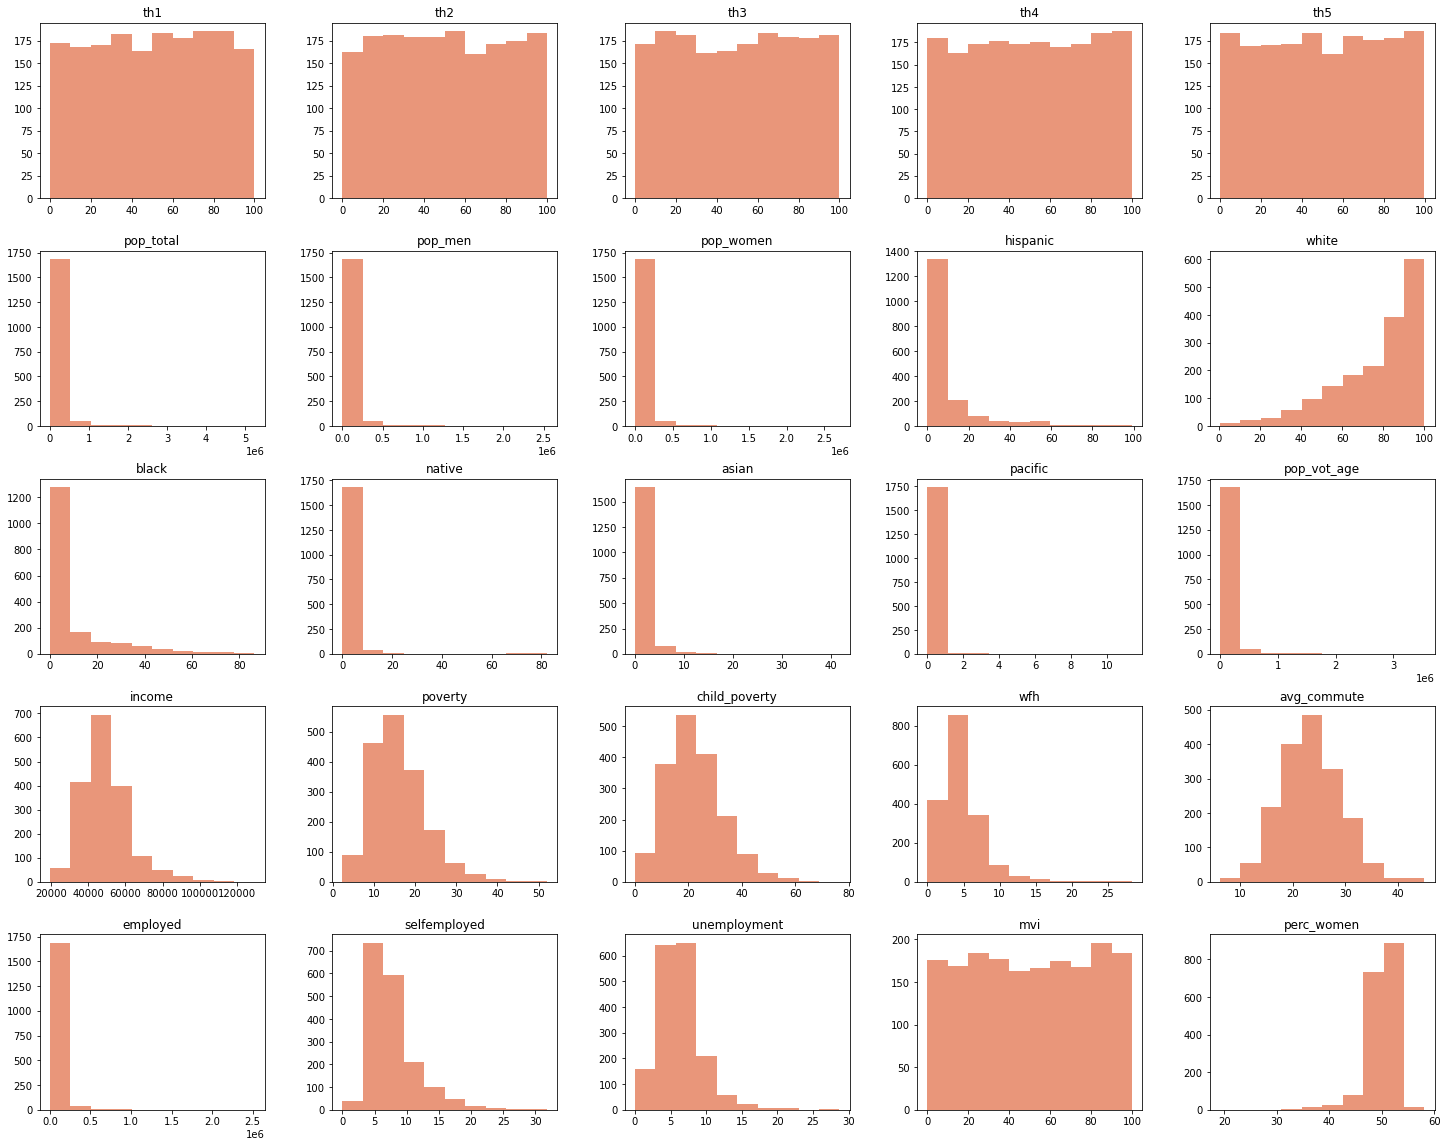

In [4]:
train.hist(grid = False, figsize = (25, 20), color = 'darksalmon')
plt.show()

### Looking at the individual distributions . . . 
- The `thx` and `mvi` scores are mostly uniformly distributed.
- The `avg_commute` is the only variable that is somewhat normally distributed. 
- The rest are either left or right skewed, some severely so. On the next pass I would like to further explore outliers and see if removing them would affect my analysis. 

# Bivariate and Multivariate Exploration
For the mvp I will initally, explore the county data across all U.S. States. If I find anything interesting or unusual then I will potentially look at the data regionally or break it out by state. 
## Inital Thoughts: 
I think that `poverty` will have the strongest positive correlation to my `mvi` scores, while race will have strong correlations with `mvi`, with `white` having the strongest negative correlation with `mvi` score.
>I will break my variables into lists based on their dtypes and then plot a correlation map of all my continuous variables to get a bird's eye view of what is most strongly correlated with `mvi` score and also use the same plot to see what variables are strongly correlated to those to ensure I am not clustering or modeling with independent variables that have strong correlations with one another.

# dtype lists
Before I begin my bivariate and multivariate exploration, I am going to create lists for my columns and group them based on their dtype

In [5]:
# creating empty lists to be appended in for loop
obj_list = []
num_list = []
bool_list = []

# for loop to append df columns to corresponding lists
for col in train.columns:
    if train[col].dtype == 'O':
        obj_list.append(col)
    elif train[col].dtype == 'bool':
        bool_list.append(col)
    else:
        num_list.append(col)
        
print(f'Object List:\n{obj_list}\n\nNumeric List:\n{num_list}\n\nBool List:\n{bool_list}')


Object List:
['state', 'county']

Numeric List:
['th1', 'th2', 'th3', 'th4', 'th5', 'pop_total', 'pop_men', 'pop_women', 'hispanic', 'white', 'black', 'native', 'asian', 'pacific', 'pop_vot_age', 'income', 'poverty', 'child_poverty', 'wfh', 'avg_commute', 'employed', 'selfemployed', 'unemployment', 'mvi', 'perc_women']

Bool List:
['more_women']


## multifigure KDE plot

In [6]:
train.head(2)

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300


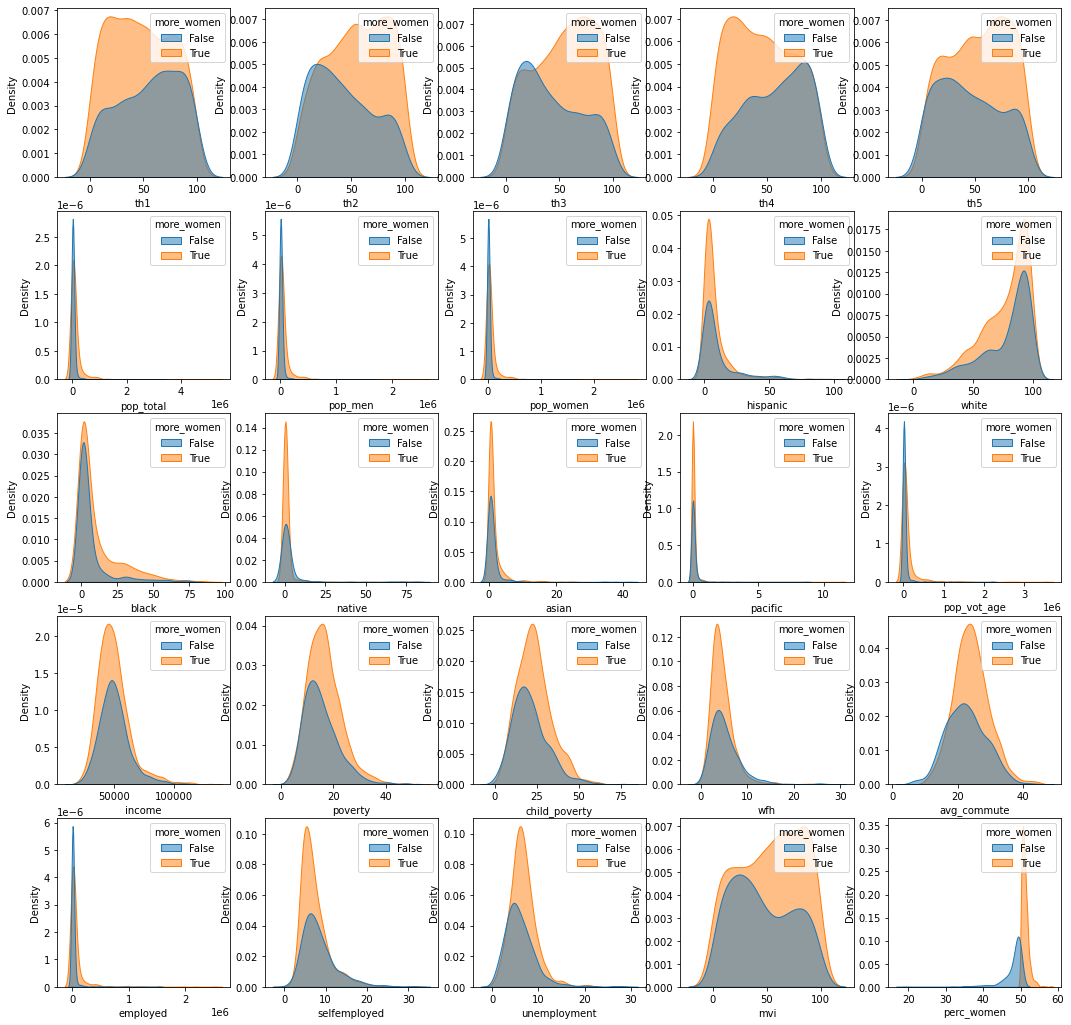

In [7]:
fig, axs = plt.subplots(nrows = 5, ncols = 5, figsize = (18, 18))

for ax, n in zip(axs.ravel(), num_list):
#     train[n].plot(ax = ax)
    sns.kdeplot(train[n], ax = ax, hue = train.more_women, fill = True, alpha = .5);

In [9]:
# list(zip(ax.ravel(), num_list))

In [10]:
train.head()

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300
48231,Texas,73.730,64.440,50.430,98.030,85.290,Hunt County,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,True,50.800
48065,Texas,97.580,17.960,35.690,93.730,12.860,Carson County,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,True,52.100
12125,Florida,17.640,92.420,61.730,83.730,75.520,Union County,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,False,35.200


## Correlation heatmap

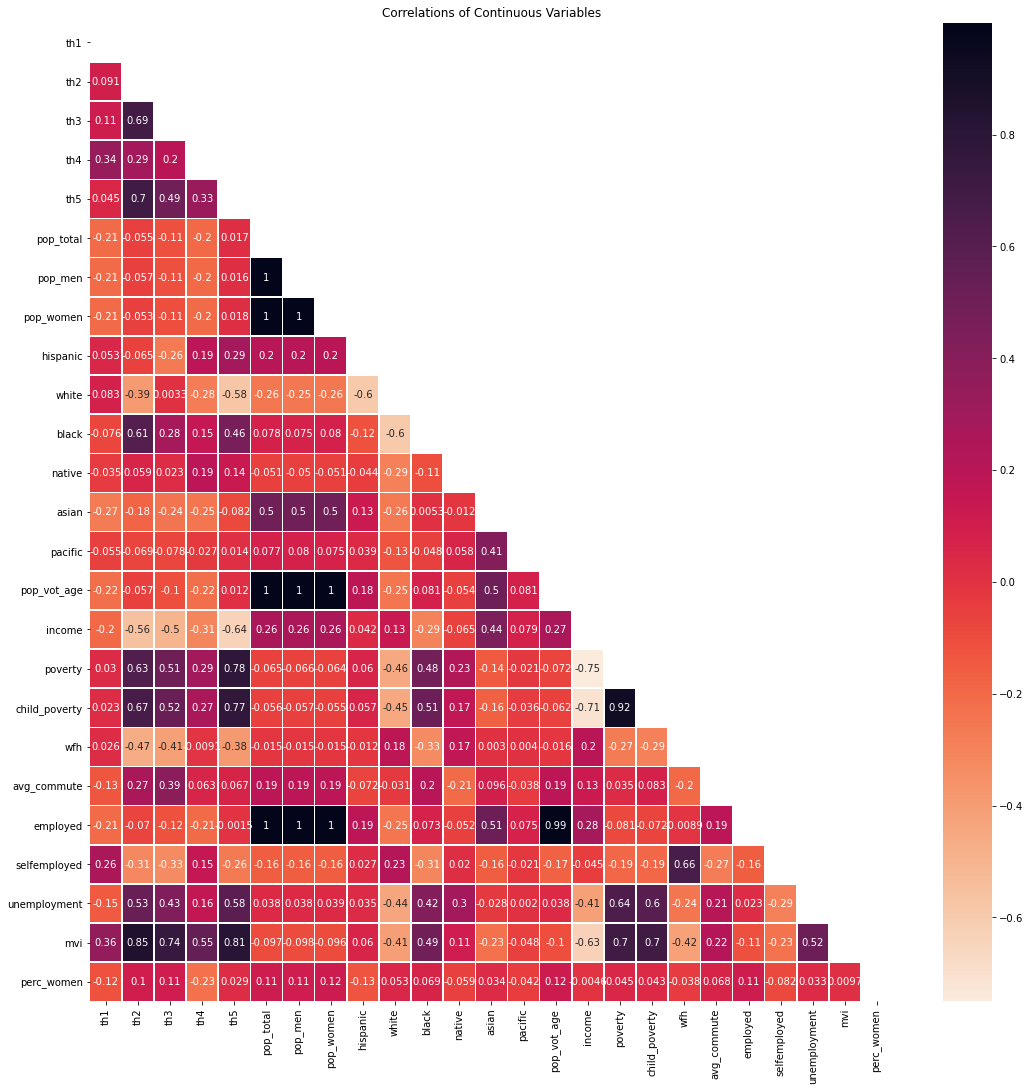

In [11]:
# correlation table
corr = train[num_list].corr()

# setting figure size
plt.figure(figsize = (18, 18))

# mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# setting color palette
cmap = sns.color_palette("rocket_r", as_cmap=True)

# plotting correlation heatmap
sns.heatmap(corr, mask = mask, linewidths=.6, cmap = cmap, annot = True)
plt.title('Correlations of Continuous Variables')
plt.show()

In [12]:
pd.DataFrame(corr.mvi.sort_values(ascending = True).head())

,mvi
income,-0.634
wfh,-0.416
white,-0.406
selfemployed,-0.234
asian,-0.229


In [13]:
neg_corr_list = list(corr.mvi.sort_values(ascending = True).head().index)
print(f'The folowing variables have the strongest negative correlation to the target, mvi score var:\n{neg_corr_list}')

The folowing variables have the strongest negative correlation to the target, mvi score var:
['income', 'wfh', 'white', 'selfemployed', 'asian']


### This makes sense:
1. Income
>If a county's average `income` is higher, then it makes sense that mothers would have a lower vulnerability to adverse maternal health outcomes.

2. Work from Home
>If a county has a higher `wfh` rate, then mothers appear to be less vulnerable to adverse maternal health outcomes.

3. White
>This aligns with my initial thoughts, and indicates that race may be a strong driver in adverse maternal health outcomes. It seems that states with higher percentages of `white` residents, fair much better than those with other minorities
    - *Also of note: counties with higher `black` populations have the highest correlation with high `mvi` maternal vulnerability scores. This is something I would like to further explore and find out what is going on in these counties*
    

4. Self Employed
 >This along with `wfh` speaks to working conditions, specifically flexibility in work and how it can impact a mother's vulnerability to adverse health outcomes. 

In [14]:
pd.DataFrame(corr.mvi.sort_values(ascending = False).head(6)[1:])

,mvi
th2,0.850
th5,0.810
th3,0.743
child_poverty,0.703
poverty,0.701


In [15]:
pos_corr_list = list(corr.mvi.sort_values(ascending = False).head(8).index)
print(f'The folowing variables have the strongest positive correlation to the target, mvi score var:\n{pos_corr_list}')

The folowing variables have the strongest positive correlation to the target, mvi score var:
['mvi', 'th2', 'th5', 'th3', 'child_poverty', 'poverty', 'th4', 'unemployment']


1. TH scores `2`, `5`, and `3` (descriptions below) have very strong positive correlations to `mvi`
>- `th2`: Existing physical health conditions
>- `th5`: Socioeconomic conditions (education, poverty, English fluency, family structure, poverty)
>- `th3`: Mental health and substance abuse

#### Although the scores are pretty close, I find it interesting that physical health and socioeconomic conditions have a higher positive correlation to `mvi` than mental health and substance abuse. I would assume that physical health and better social conditions would make it easier to access to resources, support, and treatment to manage mental health and substance abuse issues, catch them early before they become more destructive, or prevent them from the outset. 

This also aligns with my initial thoughts that poverty may be driving `mvi`. `poverty` and `child_poverty` are right up there with the top positive correlations.

### Now I want to see how correlated each of the possible `mvi` drivers are with one another to make sure I am not clustering or modeling with variables that correlate with one another.
I will create a function and use it create a scatterplot of each variable pairing and then run `pearsonsr` tests to calculate the correlation coefficients and p values.

In [16]:
# combining all of the positively and negatively top correlated variables 
#     (excluding the target, which has a perfect positive correlation with itself)

all_corr_list = pos_corr_list[1:] + neg_corr_list
all_corr_list

['th2',
 'th5',
 'th3',
 'child_poverty',
 'poverty',
 'th4',
 'unemployment',
 'income',
 'wfh',
 'white',
 'selfemployed',
 'asian']

In [17]:
pd.Series(all_corr_list)

0               th2
1               th5
2               th3
3     child_poverty
4           poverty
5               th4
6      unemployment
7            income
8               wfh
9             white
10     selfemployed
11            asian
dtype: object

In [18]:
pd.Series(all_corr_list).index

RangeIndex(start=0, stop=12, step=1)

In [19]:
pd.Series(all_corr_list)[1]

'th5'

In [84]:
# base level function, borrowed from class notes docs put together by instructor
def corr_explore(df, var_x, var_y):
    '''
    This nifty function takes in a df, a string for x variable,
    and a string for y variable and displays their correlation.
    '''
    
    # plot scatterplot of the var_x plotted against variable2
    df.plot.scatter(var_x, var_y)
    plt.title(f"{var_x}'s Relationship with {var_y}")
    plt.show()
    
    # calculate the (r) corr coefficient and (p) p-value and then print results 
    r, p = stats.pearsonr(df[var_x], df[var_y])
    print(f'The r-value or correlation coefficient is:\n{round(r, 2)}')
    print()
    print(f'The p-value is:\n{p}\n\nThere is {round(p, 1)}% chance that we see these results by chance.')

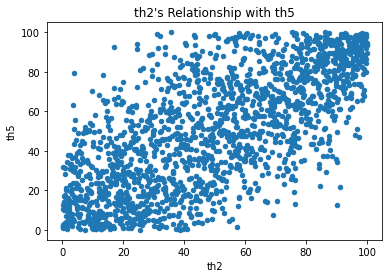

The r-value or correlation coefficient is:
0.7

The p-value is:
1.4561762824797324e-262

There is 0.0% chance that we see these results by chance.


In [85]:
# base level code, this will run the function and give me my r, p value, and scatterplot
corr_explore(train, 'th2', 'th5')

## Now to create a list of the possibly `var_x` and `var_y` combinations to iterate the base function over...

In [24]:
from itertools import combinations

In [29]:
# a list of all possible (non-repeating) variable combinations from my all_corr_list 
print(f'There are {len(list(combinations(all_corr_list, 2)))} possible non-repeating variable combinations in my all_corr_list.')
print()
print('Combinations:')
list(combinations(all_corr_list, 2))

There are 66 possible non-repeating variable combinations in my all_corr_list.

Combinations:


[('th2', 'th5'),
 ('th2', 'th3'),
 ('th2', 'child_poverty'),
 ('th2', 'poverty'),
 ('th2', 'th4'),
 ('th2', 'unemployment'),
 ('th2', 'income'),
 ('th2', 'wfh'),
 ('th2', 'white'),
 ('th2', 'selfemployed'),
 ('th2', 'asian'),
 ('th5', 'th3'),
 ('th5', 'child_poverty'),
 ('th5', 'poverty'),
 ('th5', 'th4'),
 ('th5', 'unemployment'),
 ('th5', 'income'),
 ('th5', 'wfh'),
 ('th5', 'white'),
 ('th5', 'selfemployed'),
 ('th5', 'asian'),
 ('th3', 'child_poverty'),
 ('th3', 'poverty'),
 ('th3', 'th4'),
 ('th3', 'unemployment'),
 ('th3', 'income'),
 ('th3', 'wfh'),
 ('th3', 'white'),
 ('th3', 'selfemployed'),
 ('th3', 'asian'),
 ('child_poverty', 'poverty'),
 ('child_poverty', 'th4'),
 ('child_poverty', 'unemployment'),
 ('child_poverty', 'income'),
 ('child_poverty', 'wfh'),
 ('child_poverty', 'white'),
 ('child_poverty', 'selfemployed'),
 ('child_poverty', 'asian'),
 ('poverty', 'th4'),
 ('poverty', 'unemployment'),
 ('poverty', 'income'),
 ('poverty', 'wfh'),
 ('poverty', 'white'),
 ('povert

In [45]:
combos = list(combinations(all_corr_list, 2))
print(f'The variable combos is comprised of a {type(combos)} of {type(combos[1])}s.')
print(f'There are {len(combos)} different var_x, var_y combinations.')

The variable combos is comprised of a <class 'list'> of <class 'tuple'>s.
There are 66 different var_x, var_y combinations.


In [67]:
# creating combos list, combos was a list of tuples, now combos_list will be a list of lists
combos_list = []

for i in range(0, len(combos)):
    combos_list.append(list(combos[i]))

combos_list

[['th2', 'th5'],
 ['th2', 'th3'],
 ['th2', 'child_poverty'],
 ['th2', 'poverty'],
 ['th2', 'th4'],
 ['th2', 'unemployment'],
 ['th2', 'income'],
 ['th2', 'wfh'],
 ['th2', 'white'],
 ['th2', 'selfemployed'],
 ['th2', 'asian'],
 ['th5', 'th3'],
 ['th5', 'child_poverty'],
 ['th5', 'poverty'],
 ['th5', 'th4'],
 ['th5', 'unemployment'],
 ['th5', 'income'],
 ['th5', 'wfh'],
 ['th5', 'white'],
 ['th5', 'selfemployed'],
 ['th5', 'asian'],
 ['th3', 'child_poverty'],
 ['th3', 'poverty'],
 ['th3', 'th4'],
 ['th3', 'unemployment'],
 ['th3', 'income'],
 ['th3', 'wfh'],
 ['th3', 'white'],
 ['th3', 'selfemployed'],
 ['th3', 'asian'],
 ['child_poverty', 'poverty'],
 ['child_poverty', 'th4'],
 ['child_poverty', 'unemployment'],
 ['child_poverty', 'income'],
 ['child_poverty', 'wfh'],
 ['child_poverty', 'white'],
 ['child_poverty', 'selfemployed'],
 ['child_poverty', 'asian'],
 ['poverty', 'th4'],
 ['poverty', 'unemployment'],
 ['poverty', 'income'],
 ['poverty', 'wfh'],
 ['poverty', 'white'],
 ['povert

### Now that I have my list of all possible `var_x` and `var_y` combos, I can update my function so it takes in each list element, in the list, as an argument

In [86]:
def corr_explore(df, list_):
    '''

    '''
    (var_x, var_y) = list_
    
    # plot scatterplot of the var_x plotted against variable2
    df.plot.scatter(var_x, var_y)
    plt.title(f"{var_x}'s Relationship with {var_y}")
    plt.show()
    
    # calculate the (r) corr coefficient and (p) p-value and then print results 
    r, p = stats.pearsonr(df[var_x], df[var_y])
    print(f'The r-value or correlation coefficient is:\n{round(r, 2)}')
    print()
    print(f'The p-value is:\n{p}\n\nThere is {round(p, 1)}% chance that we see these results by chance.')

##### And here is the for loop that can iterate over each list element in the `combos_list` list of lists to plot and run run `pearsonsr` tests on each of my `combos_list` pairings.

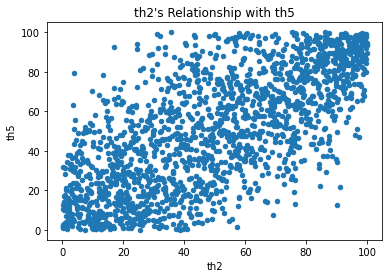

The r-value or correlation coefficient is:
0.7

The p-value is:
1.4561762824797324e-262

There is 0.0% chance that we see these results by chance.


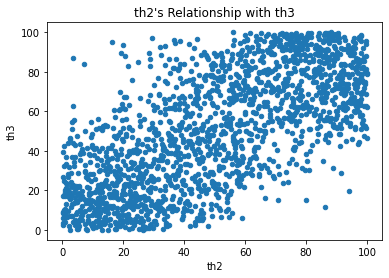

The r-value or correlation coefficient is:
0.69

The p-value is:
1.1559776099234636e-246

There is 0.0% chance that we see these results by chance.


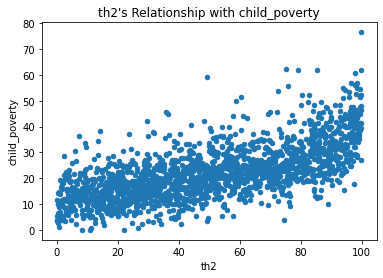

The r-value or correlation coefficient is:
0.67

The p-value is:
2.2566712915428263e-227

There is 0.0% chance that we see these results by chance.


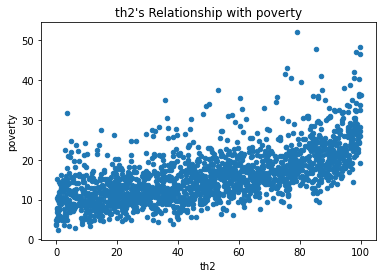

The r-value or correlation coefficient is:
0.63

The p-value is:
1.503837509340652e-193

There is 0.0% chance that we see these results by chance.


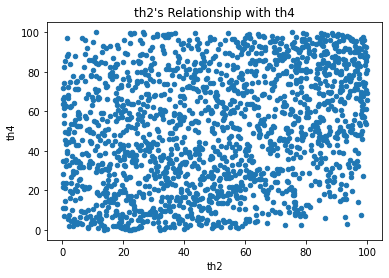

The r-value or correlation coefficient is:
0.29

The p-value is:
6.82102867387542e-36

There is 0.0% chance that we see these results by chance.


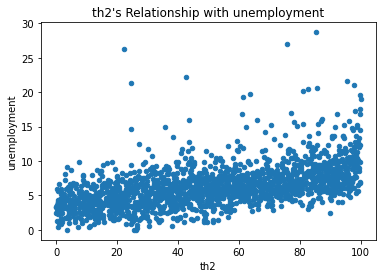

The r-value or correlation coefficient is:
0.53

The p-value is:
4.592068644245652e-128

There is 0.0% chance that we see these results by chance.


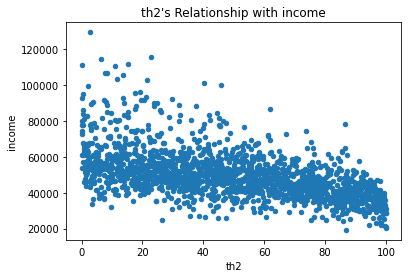

The r-value or correlation coefficient is:
-0.56

The p-value is:
4.1554434295308325e-143

There is 0.0% chance that we see these results by chance.


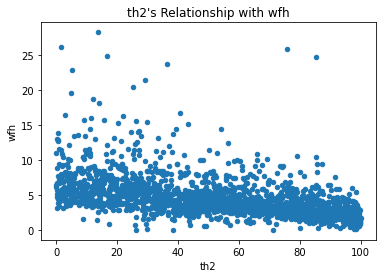

The r-value or correlation coefficient is:
-0.47

The p-value is:
4.055276029448938e-96

There is 0.0% chance that we see these results by chance.


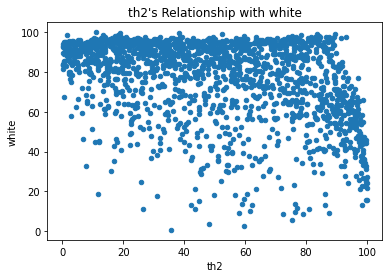

The r-value or correlation coefficient is:
-0.39

The p-value is:
2.453935976429975e-66

There is 0.0% chance that we see these results by chance.


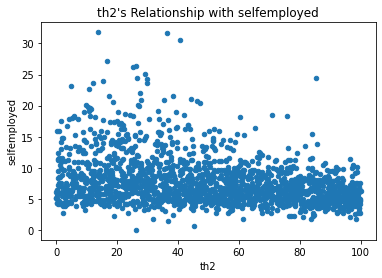

The r-value or correlation coefficient is:
-0.31

The p-value is:
1.9564997088807183e-41

There is 0.0% chance that we see these results by chance.


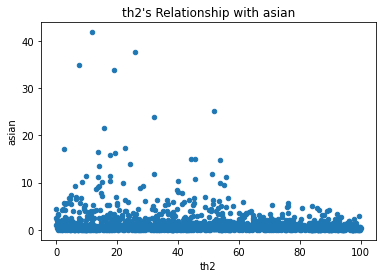

The r-value or correlation coefficient is:
-0.18

The p-value is:
2.933726561247303e-14

There is 0.0% chance that we see these results by chance.


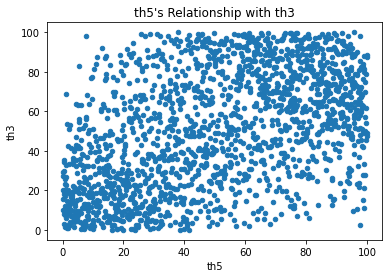

The r-value or correlation coefficient is:
0.49

The p-value is:
1.1700862707985522e-105

There is 0.0% chance that we see these results by chance.


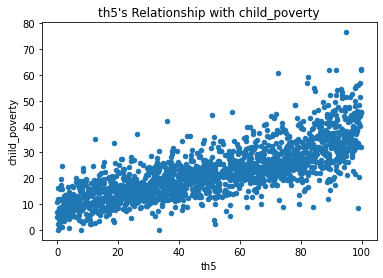

The r-value or correlation coefficient is:
0.77

The p-value is:
0.0

There is 0.0% chance that we see these results by chance.


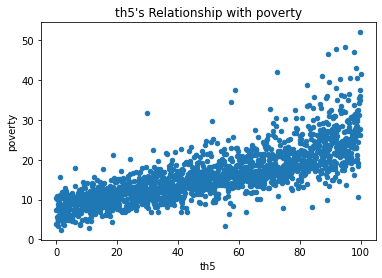

The r-value or correlation coefficient is:
0.78

The p-value is:
0.0

There is 0.0% chance that we see these results by chance.


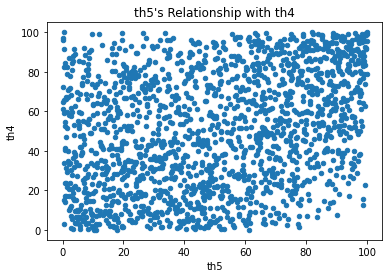

The r-value or correlation coefficient is:
0.33

The p-value is:
1.3555142434740717e-45

There is 0.0% chance that we see these results by chance.


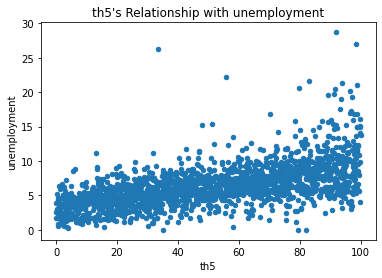

The r-value or correlation coefficient is:
0.58

The p-value is:
6.640432652644357e-161

There is 0.0% chance that we see these results by chance.


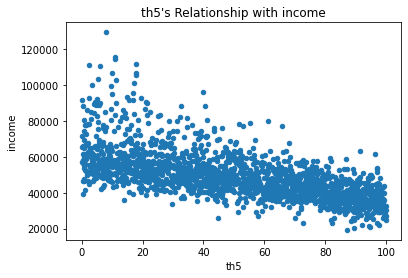

The r-value or correlation coefficient is:
-0.64

The p-value is:
1.7376164430262243e-200

There is 0.0% chance that we see these results by chance.


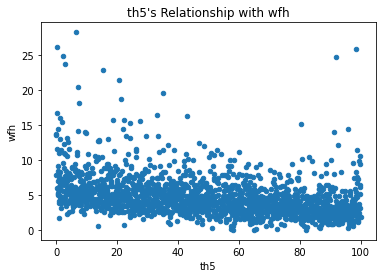

The r-value or correlation coefficient is:
-0.38

The p-value is:
7.4808967036655886e-62

There is 0.0% chance that we see these results by chance.


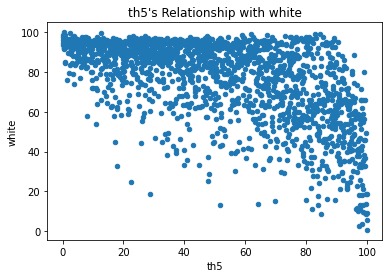

The r-value or correlation coefficient is:
-0.58

The p-value is:
1.3092050902413905e-157

There is 0.0% chance that we see these results by chance.


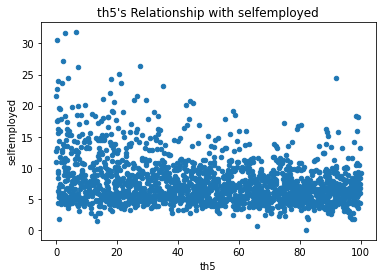

The r-value or correlation coefficient is:
-0.26

The p-value is:
7.396688170562619e-29

There is 0.0% chance that we see these results by chance.


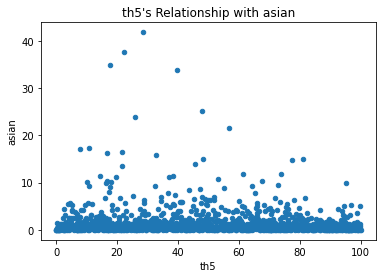

The r-value or correlation coefficient is:
-0.08

The p-value is:
0.0005416762407415849

There is 0.0% chance that we see these results by chance.


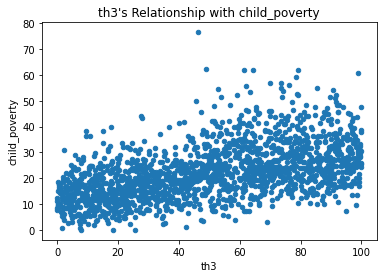

The r-value or correlation coefficient is:
0.52

The p-value is:
5.223843960660229e-124

There is 0.0% chance that we see these results by chance.


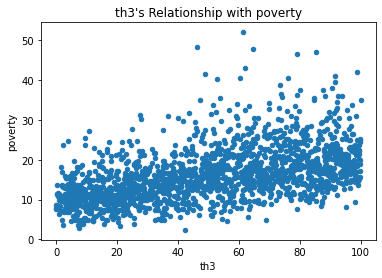

The r-value or correlation coefficient is:
0.51

The p-value is:
6.926255276167531e-119

There is 0.0% chance that we see these results by chance.


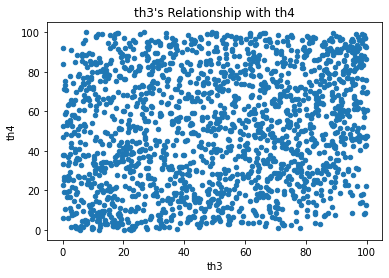

The r-value or correlation coefficient is:
0.2

The p-value is:
1.383153787152887e-16

There is 0.0% chance that we see these results by chance.


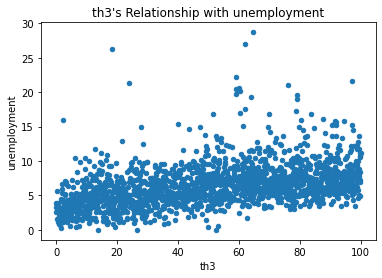

The r-value or correlation coefficient is:
0.43

The p-value is:
8.938146006665289e-82

There is 0.0% chance that we see these results by chance.


In [ ]:
for list_ in combos_list:

    corr_explore(train, list_)

#### Because variable order matters and I do not want to repeat variable combinations in different orders, I am importing the combinations function from the itertools module.

##### Now I have two groups of lists, one list with the variables with the strongest negative correlation to `mvi` and another with variables with the strongest positive correlation with `mvi`
I want to look at a pairplot with just those features to see how they interact with one another and the target. 
>I will start with the negatively correlated variables:
- `income`, 
- `wfh`, 
- `white`, 
- `selfemployed`, 
- `asian`

### This function will make this process more efficient by creating a process that can reuse the code and be applied to different slices of the `train` df

In [ ]:
# def plot_variable_pairs_regline(train, hue=None):
#     '''
# ARG:
#     - DF (or df slice)
#     - HUE, (defaule = None) categorical column to be color coded

# THIS FUNCTION TAKES IN A DF OR SLICE OF A DF, WITH A HUE ARG THAT DEFAULTS TO NONE IF UNSPECIFIED,
# AND DISPLAYS A PAIRPLOT FOR EACH COLUMN PAIRING ALONG WITH A RED REGRESSION LINE.
#     '''
#     plot_kws={'line_kws':{'color':'red'}, 
#               'scatter_kws': {'alpha': 0.7}}
#     sns.pairplot(train, hue=hue, kind="reg", plot_kws={'line_kws':{'color':'red'}, 
#                                                     'scatter_kws': {'alpha': 0.1}})

In [ ]:
# plot_variable_pairs_regline(train[neg_corr_list], hue = None)

### Key Takeways from variables that are negatively correlated with `mvi` target
These are the factors that can potentially decrease `mvi`
- `income` highly positive correlated with high percentage of population being `asian`
Counties with higher average incomes have higher asians to total population percentages. 

- `wfh` highly positive correlated with `selfemployed`
counties with higher percentages of workforce working from home also have higher percentages of populations who are self employed. 
>#### Investing in minority and low income population entrepreneurship, incentivizing companies to offer more flexible work arrangements such as remote work and working from home. 

> #### Instead of looking at `selfemployed` I will look at `wfh` as that narrows the focus. The former can be affected by many additional variables and, possibly on a third or fourth pass beyond the mvp I could look into that.

- Counties with higher percentages of `white` residents have both higher avergae `income` and higher percentages of workers `wfh`. They also have a higher percentage of `selfemployed` workers.

In [ ]:
# plot_variable_pairs_regline(train[pos_corr_list_corr_list], hue = None)

## Now I want to do some exploration and find out what is going on in counties with higher black populations
Some intial thoughts and questions
- I am thinking these counties will have higher poverty rates.
- I wonder what the highest and lowest `th` scores are for counties with higher `black` populations.

#### First I want to look at the distributions of `black` across the data.